In [34]:
from yaml import load, Loader
import pandas as pd
import util.analysis_utils as nls
from scipy import stats
from util.classes import SEEDS

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
og_df = pd.read_csv('/vol/aimspace/projects/ukbb/data/tabular/ukb668815_imaging.csv')
patients_df = nls.prep_patients_df(og_df)
cfg = load(open(f'configs/ukbb/test/exp4/ethn.yaml', 'r'), Loader=Loader)

/tmp/ipykernel_603572/3026087908.py:1: DtypeWarning: Columns (20,68,1186,1187,1188,1258,1259,1260,1552,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,31

# Supervised UNet

In [ ]:
unet_ethn_df = pd.DataFrame()
dataset = 'ukbb'
method = 'supervised'
seg_model = 'unet'
control = 'ethn'

task = 'seg_only_mid_slices'
for exp in [4]:
    for seed in SEEDS:
        res_df = pd.read_csv(f'outputs/results/csv/{dataset}/{method}/{seg_model}/exp{exp}/seed{seed}/{task}/{control}.csv')
        test_ethn_merged_df = nls.merge_results_patients(res_df, patients_df)
        nls_df = nls.get_all_results(test_ethn_merged_df, cfg)
        unet_ethn_df = pd.concat([unet_ethn_df, nls_df], ignore_index=True)

In [ ]:
nls.plot_sex_dice_intersectional(unet_ethn_df, exp=4)
nls.sub_ttest(unet_ethn_df, exp=4)
nls.sex_ttest(unet_ethn_df, exp=4)
nls.ethn_ttest(unet_ethn_df, exp=4)

# Supervised UNet Multi Modal

In [86]:
mm_ethn_df = pd.DataFrame()
dataset = 'ukbb'
method = 'supervised'
seg_model = 'unet'
control = 'ethn'

task = 'multi_modal'
for exp in [4]:
    for seed in SEEDS:
        res_df = pd.read_csv(f'outputs/results/csv/{dataset}/{method}/{seg_model}/exp{exp}/seed{seed}/{task}/{control}.csv')
        test_ethn_merged_df = nls.merge_results_patients(res_df, patients_df)
        nls_df = nls.get_all_results(test_ethn_merged_df, cfg)
        mm_ethn_df = pd.concat([mm_ethn_df, nls_df], ignore_index=True)

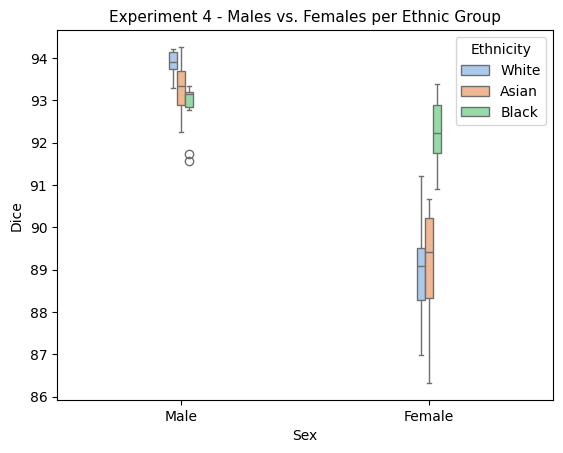

Experiment 4
white_male vs. white_female
experiment/group 4 white_male and 4 white_female.
t-statistic: 12.772530265081398
p-value: 1.8365881599321418e-10
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 white_male and 4 white_female.

asian_male vs. asian_female
experiment/group 4 asian_male and 4 asian_female.
t-statistic: 8.485416558798796
p-value: 1.0486111549366252e-07
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 asian_male and 4 asian_female.

black_male vs. black_female
experiment/group 4 black_male and 4 black_female.
t-statistic: 1.860561533302181
p-value: 0.07922398684334828
There is not sufficient evidence (p-value >= 0.05) to conclude a statistically significant difference in DICE similarity scores between experiment/group 4 black_male and 4 black_female.

-------------


In [87]:
nls.plot_sex_dice_intersectional(mm_ethn_df, exp=4)
nls.sub_ttest(mm_ethn_df, exp=4)

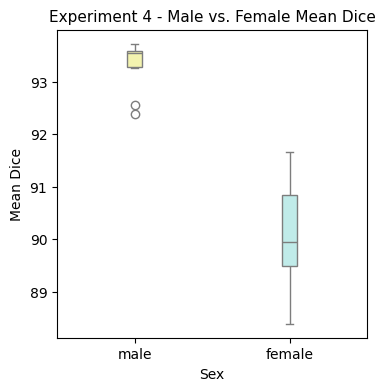

Experiment 4
-------------
experiment/group 4 male and 4 female.
t-statistic: 9.377451034109768
p-value: 2.3790548202016292e-08
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 male and 4 female.



In [88]:
nls.boxplot_sex_dice(mm_ethn_df, exp=4)
nls.sex_ttest(mm_ethn_df, exp=4)

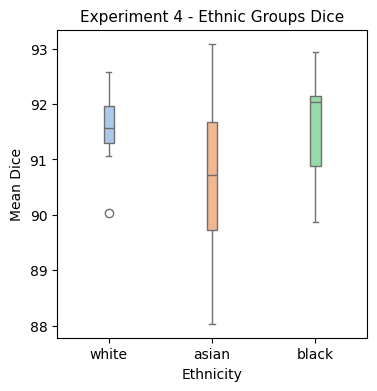

Experiment 4
-------------
experiment/group 4 white and 4 asian.
t-statistic: 1.4010052680966187
p-value: 0.17821748445340405
There is not sufficient evidence (p-value >= 0.05) to conclude a statistically significant difference in DICE similarity scores between experiment/group 4 white and 4 asian.

experiment/group 4 white and 4 black.
t-statistic: -0.24542939221136806
p-value: 0.8089004503698491
There is not sufficient evidence (p-value >= 0.05) to conclude a statistically significant difference in DICE similarity scores between experiment/group 4 white and 4 black.

experiment/group 4 asian and 4 black.
t-statistic: -1.4300398223175035
p-value: 0.16983481710129472
There is not sufficient evidence (p-value >= 0.05) to conclude a statistically significant difference in DICE similarity scores between experiment/group 4 asian and 4 black.



In [89]:
nls.boxplot_ethn_dice(mm_ethn_df, exp=4)
nls.ethn_ttest(mm_ethn_df, exp=4)

# Supervised UNet Multi Task

In [90]:
mt_ethn_df = pd.DataFrame()
task = 'multi_task'
for exp in [4]:
    for seed in SEEDS:
        res_df = pd.read_csv(f'outputs/results/csv/{dataset}/{method}/{seg_model}/exp{exp}/seed{seed}/{task}/{control}.csv')
        test_ethn_merged_df = nls.merge_results_patients(res_df, patients_df)
        nls_df = nls.get_all_results(test_ethn_merged_df, cfg)
        mt_ethn_df = pd.concat([mt_ethn_df, nls_df], ignore_index=True)

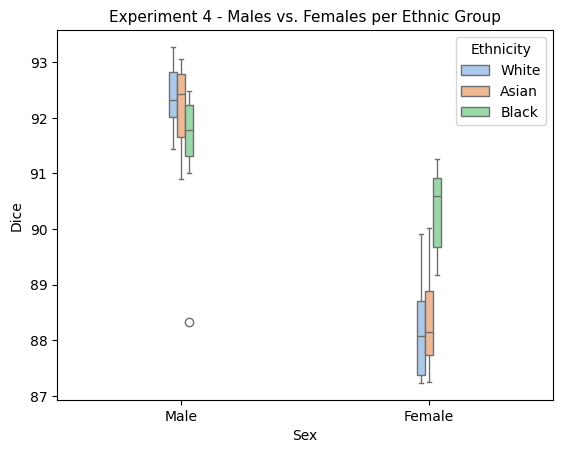

Experiment 4
white_male vs. white_female
experiment/group 4 white_male and 4 white_female.
t-statistic: 11.224493120036469
p-value: 1.4679152448621748e-09
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 white_male and 4 white_female.

asian_male vs. asian_female
experiment/group 4 asian_male and 4 asian_female.
t-statistic: 10.903453317410511
p-value: 2.3221850474478797e-09
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 asian_male and 4 asian_female.

black_male vs. black_female
experiment/group 4 black_male and 4 black_female.
t-statistic: 2.5055281265458076
p-value: 0.02205306351760775
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 black_male and 4 black_female.

-------------


In [91]:
nls.plot_sex_dice_intersectional(mt_ethn_df, exp=4)
nls.sub_ttest(mt_ethn_df, exp=4)

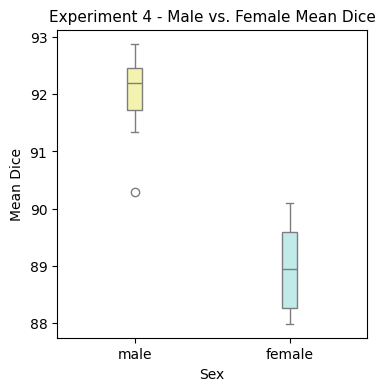

Experiment 4
-------------
experiment/group 4 male and 4 female.
t-statistic: 8.79287172051143
p-value: 6.220305759005216e-08
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 male and 4 female.



In [92]:
nls.boxplot_sex_dice(mt_ethn_df, exp=4)
nls.sex_ttest(mt_ethn_df, exp=4)

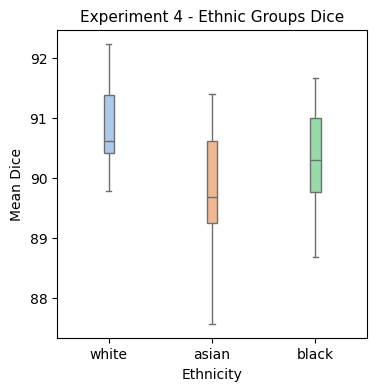

Experiment 4
-------------
experiment/group 4 white and 4 asian.
t-statistic: 2.319362306104854
p-value: 0.03233403912389386
There is a statistically significant difference (p-value < 0.05) in DICE similarity scores between experiment/group 4 white and 4 asian.

experiment/group 4 white and 4 black.
t-statistic: 1.2754035481411745
p-value: 0.2183819586556558
There is not sufficient evidence (p-value >= 0.05) to conclude a statistically significant difference in DICE similarity scores between experiment/group 4 white and 4 black.

experiment/group 4 asian and 4 black.
t-statistic: -1.1188101283211072
p-value: 0.2779301566942308
There is not sufficient evidence (p-value >= 0.05) to conclude a statistically significant difference in DICE similarity scores between experiment/group 4 asian and 4 black.



In [93]:
nls.boxplot_ethn_dice(mt_ethn_df, exp=4)
nls.ethn_ttest(mt_ethn_df, exp=4)


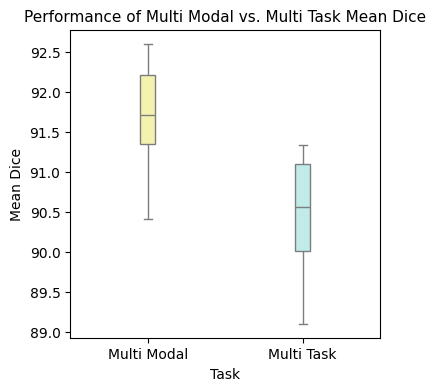

In [104]:
nls.boxplot_tasks(mm_ethn_df, mt_ethn_df)
nls.sex_ttest(mt_ethn_df, exp=4)